# Perceptron Algorithm

## Load data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('dataset_LP_2.csv',header = None)
df.columns = ["feature 1","feature 2", "feature 3","label"]

# txt file can also be read with read csv because all the values are comma seperated
# df_2 = pd.read_csv('dataset_LP_1.txt',header = None)

In [29]:
df

,feature 1,feature 2,feature 3,label
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1
...,...,...,...,...
995,-3.680139,0.966962,-0.904337,0
996,-4.063900,0.802611,1.023708,1
997,-0.814430,-0.693945,0.876776,1
998,-0.325122,-0.759024,1.299772,1


In [30]:
counts = df['label'].value_counts()

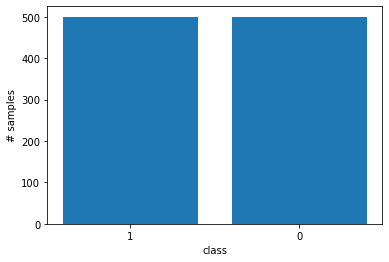

In [31]:
plt.bar(['1','0'], counts)
plt.xlabel('class')
plt.ylabel('# samples')
plt.show()

In [61]:
data = df.values
data

array([[-6.67241846, -1.20619835, -1.08104986,  0.        ],
       [ 1.67559763,  0.61499432, -0.97160014,  0.        ],
       [-4.03905804,  0.33510238,  0.54461753,  1.        ],
       ...,
       [-0.81442967, -0.6939448 ,  0.87677634,  1.        ],
       [-0.32512155, -0.75902371,  1.29977242,  1.        ],
       [-1.50343056, -0.26945838, -1.12438972,  0.        ]])

## Train-Test Split

In [62]:
def train_test_split(data,split,randomize=True):
    """
    Parameters:
        data: numpy array of the dataset
        split: percentage of the samples required for the training data
        randomize: boolean representing whether you want to randomize the dataset
    """
    
    split_index = int(split*len(data))
    
    # randomly shuffles rows of the dataset
    if randomize == True:
        np.random.shuffle(data)
    
    
    X = data[:,:-1]
    y = data[:,-1]
    
    train_X = X[:split_index]
    train_y = y[:split_index]
    
    test_X = X[split_index:]
    test_y = y[split_index:]
    
    return train_X,train_y,test_X,test_y
    

In [63]:
train_X,train_y,test_X,test_y = train_test_split(data,0.7)